In [43]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import sklearn.tree as skt
import sklearn.metrics as skmt


path: str = './data/telecom_churn.csv'
df: pd.DataFrame = pd.read_csv(path)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Загрузка прошла успешно

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Пропусков нет

In [46]:
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [47]:
noYesDict = {
    "No": 0,
    "Yes": 1
}

df['International plan'] = df['International plan'].map(noYesDict)
df['Voice mail plan'] = df['Voice mail plan'].map(noYesDict)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [48]:
df['International plan'].value_counts()

0    3010
1     323
Name: International plan, dtype: int64

In [49]:
df['Churn'] = np.where(df['Churn'], 1, 0)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [50]:
le = skp.LabelEncoder()
df.State = le.fit_transform(df.State)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


<AxesSubplot:>

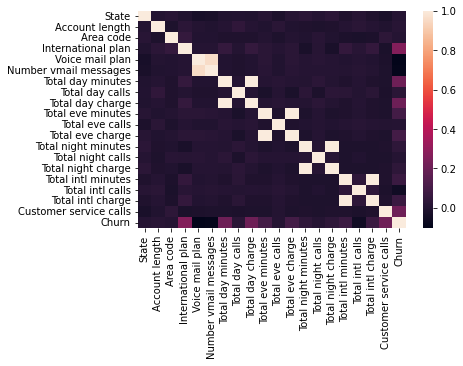

In [51]:
sb.heatmap(df.corr(), annot=False, fmt='.1f')

Количесво звонков связано со стоимостью

Ушел или нет клиент связано с международным планом, количеством звонков в минутах и количеством звонков в сервис поддержки

Но ярковыраженных зависимостей нет

array([[<AxesSubplot:title={'center':'State'}>,
        <AxesSubplot:title={'center':'Account length'}>,
        <AxesSubplot:title={'center':'Area code'}>,
        <AxesSubplot:title={'center':'International plan'}>],
       [<AxesSubplot:title={'center':'Voice mail plan'}>,
        <AxesSubplot:title={'center':'Number vmail messages'}>,
        <AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total day calls'}>],
       [<AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total eve minutes'}>,
        <AxesSubplot:title={'center':'Total eve calls'}>,
        <AxesSubplot:title={'center':'Total eve charge'}>],
       [<AxesSubplot:title={'center':'Total night minutes'}>,
        <AxesSubplot:title={'center':'Total night calls'}>,
        <AxesSubplot:title={'center':'Total night charge'}>,
        <AxesSubplot:title={'center':'Total intl minutes'}>],
       [<AxesSubplot:title={'center':'Total intl calls'}>,

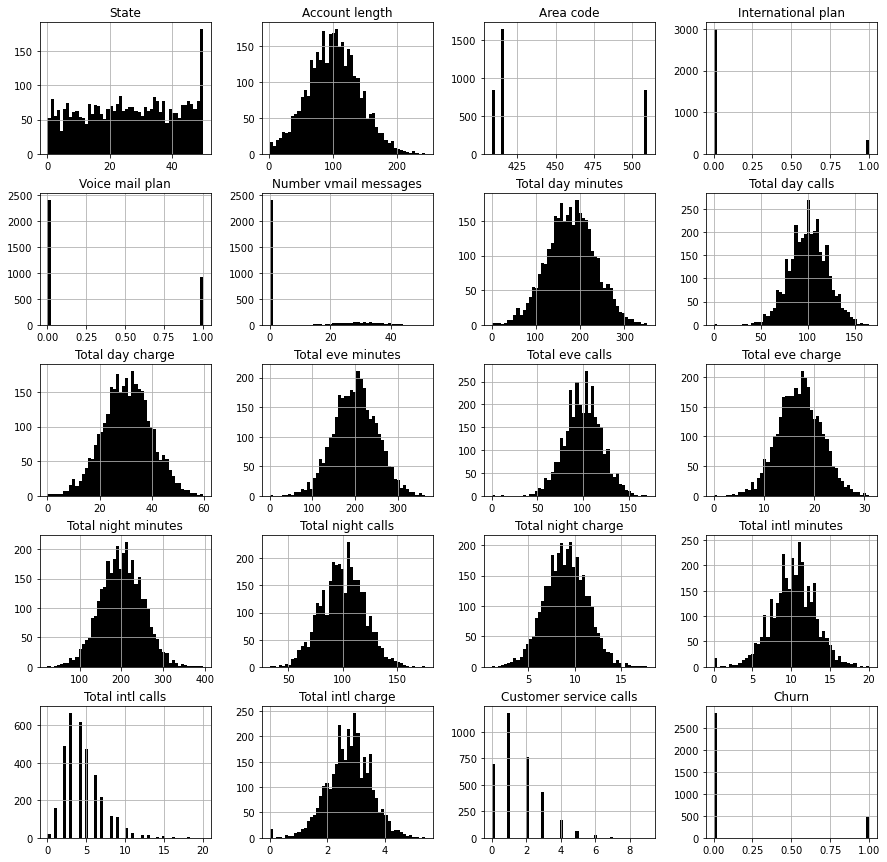

In [52]:
df.hist(figsize=(15,15), bins=50, color='black')


Распределение примерно нормальное 

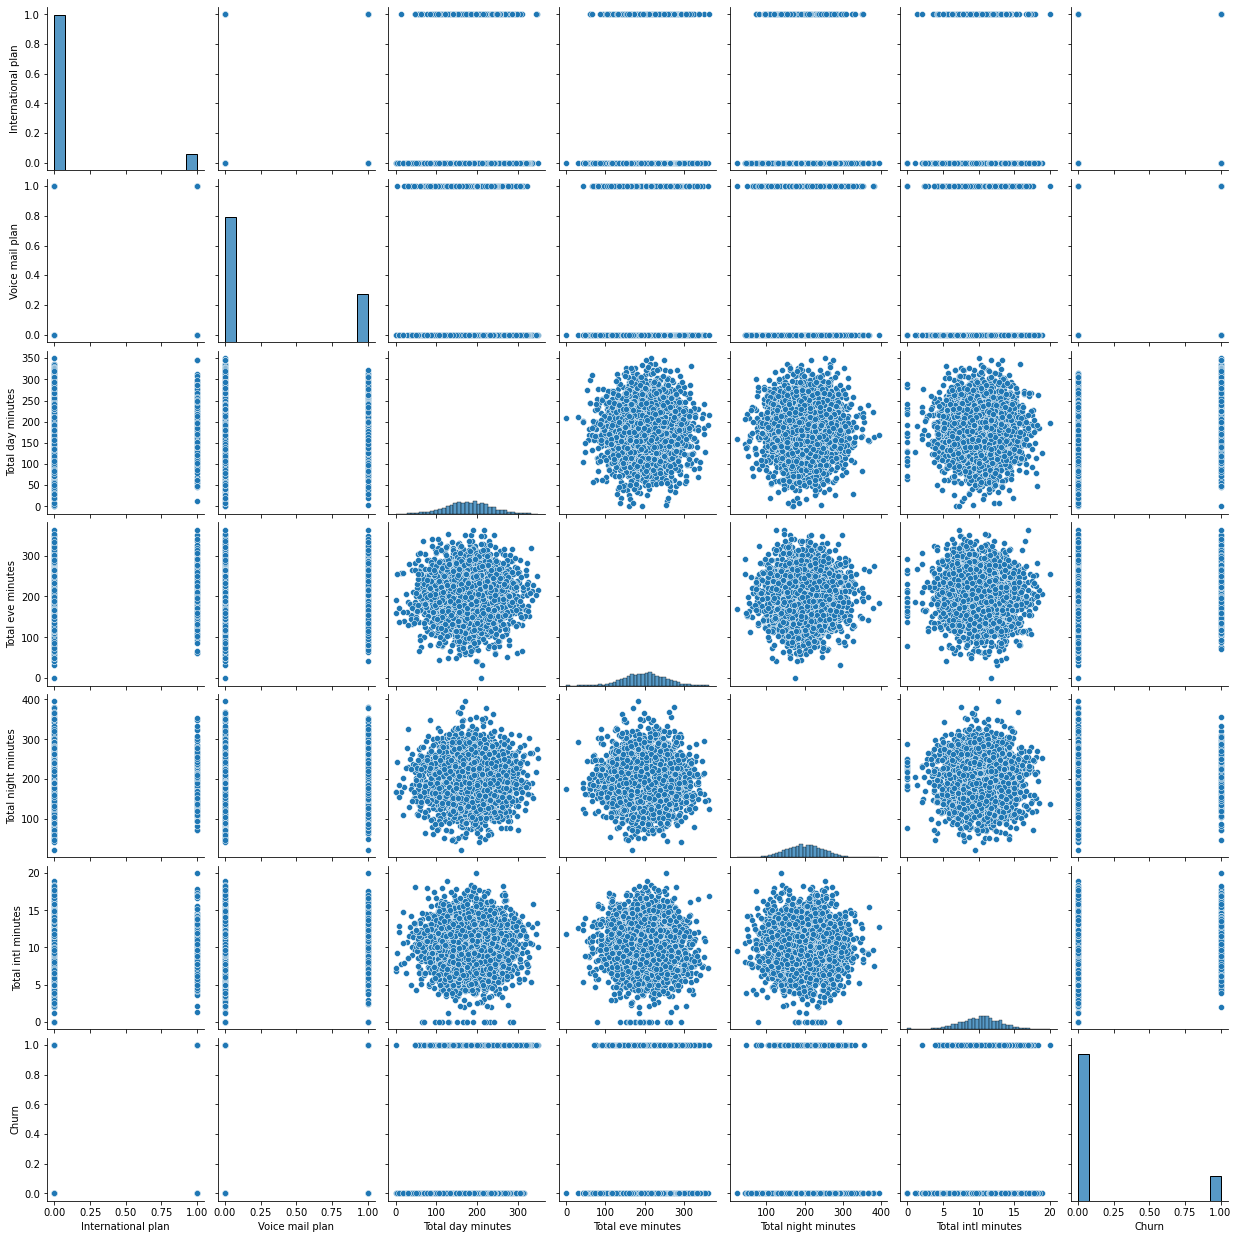

In [53]:
sb.pairplot(df[['International plan', 'Voice mail plan', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes', 'Churn']])

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\VPR\anaconda3\lib\s

<AxesSubplot:xlabel='Total day minutes', ylabel='Churn'>

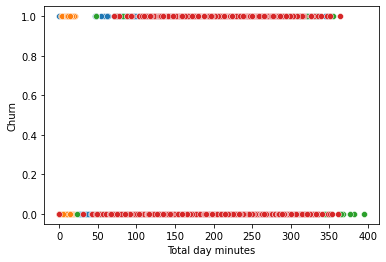

In [54]:
sb.scatterplot(df['Total day minutes'], df.Churn)
sb.scatterplot(df['Total intl minutes'], df.Churn)
sb.scatterplot(df['Total night minutes'], df.Churn)
sb.scatterplot(df['Total eve minutes'], df.Churn)

<AxesSubplot:>

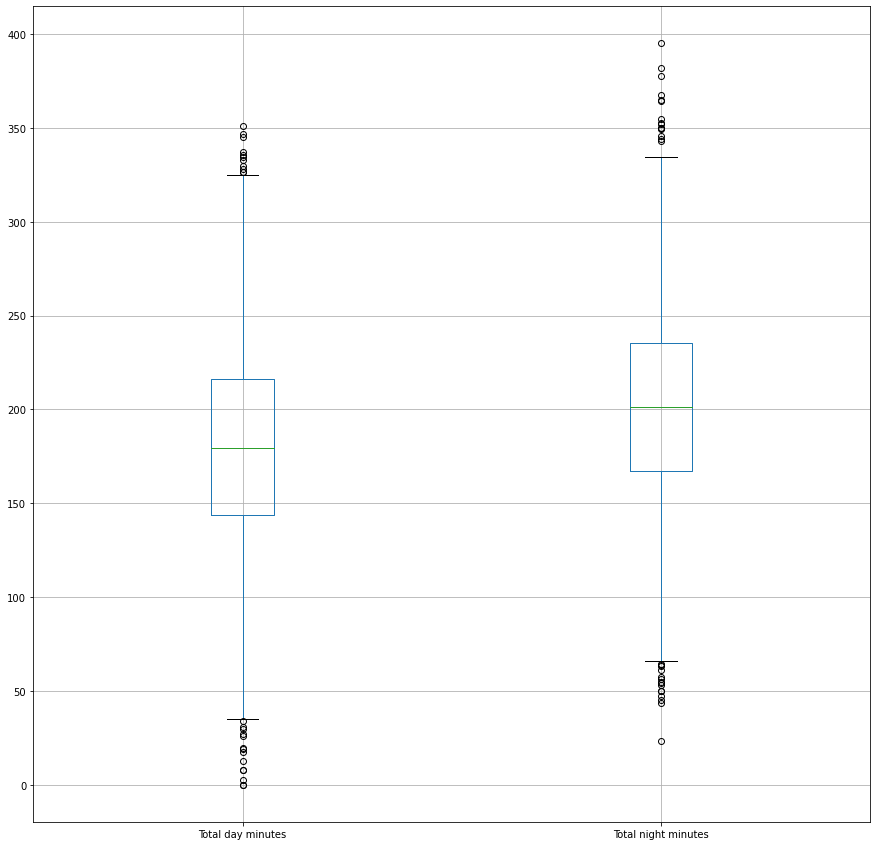

In [55]:
df.boxplot(figsize=(15, 15), column=['Total day minutes', 'Total night minutes',])

In [56]:
df = df.drop(columns=['State','Area code','Total day minutes', 'Number vmail messages', 'Total night minutes', 'Total eve minutes', 'Total intl minutes'], index=1)


<AxesSubplot:>

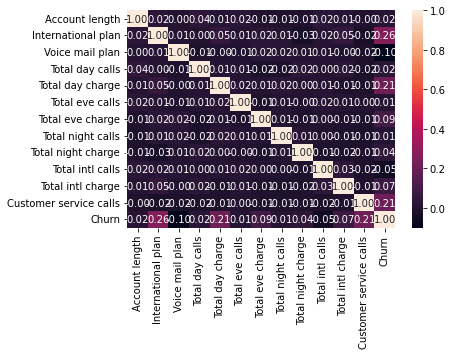

In [57]:
sb.heatmap(df.corr(), annot=True, fmt='.2f')

Масштабирование данных для использования в разных алгоритмах

In [58]:
scal = skp.StandardScaler()
df_scal:pd.DataFrame = scal.fit_transform(df.drop(columns=['Churn'], axis=1))


Разбиение данных на аргументы и целевую переменную

In [59]:
x= df_scal.copy()
y = df.Churn

Разбиение данных

In [60]:
x_train, x_test, y_train, y_test = skm.train_test_split(x, y,test_size=0.3,stratify=y,random_state=1)

In [61]:
clf = skt.DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.912

In [62]:
y_predict = clf.predict(x_test)
skmt.accuracy_score(y_test, y_predict)

0.912

Так как 